# Modeling Rocket Motion

Our simulation models a rocket moving in a space on a single axis. Our rocket have a mass of 500,000 kilograms, with 2 stages. Our first stage mass is 5000 kilograms. Our thruster has an exhaust velocity of 3000 meters per second.

The fuel within the rocket is stored in 2 containers that are 10% the mass of the rocket. Each of the containers hold fuel that is 30% the mass of the rocket. This equates to 80% the mass of the rocket used solely for fuel and the fuel containers. As the rocket travels and fuel is used, once the rocket uses half of the total fuel (all of the fuel from one container), the rocket "ejects" the fuel pod as it becomes "dead weight" once the fuel is gone. The rocket does the same thing once the second fuel pod is empty.

## Research Questions

1. What effect does the mass of the fuel have on the velocity of the rocket?

2. What effect does the mass of the fuel have on the momentum of the rocket?

3. What effect does the choice of numerical integrator have on our results? (Euler, RK2, RK4)

## The Physics

For our calculations, the first thing we need to solve our system is $F_\mathrm{thrust}$ <br><br> Our equation for this
is $F_\mathrm{thrust}  = \frac{dm}{dt}\ \times v_\mathrm{ex}$

To find our rockets velocity, we use the equation $\frac{dx}{dt}\ = v_x$ <br>

To find the acceleration of the rocket, we use the equation $\frac{dv_x}{dt}\ = \frac{F_\mathrm{thrust}}{m}$


## Our simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ode
from vpython import *

<IPython.core.display.Javascript object>

In [2]:
def rocket(var,t):
    """ ODE for Rocket Motion
        Calculate the derivatives of variables for the rocket
        dep - data array, t - time """
   
    x = var[0]
    v = var[1]
    m = var[2]
    
    Fthrust = -burnrate * vex
    
    deriv = np.zeros(3)
    deriv[0] = v
    deriv[1] = Fthrust / m
    deriv[2] = burnrate
    
    return deriv

In [3]:
mulfac = 1000 #multiply factor
m0 = 500 * mulfac #mass of rocket
mfuel0 = .6*m0
mfuelcan0 = .1*m0
rocketpos = 0
vex = 3000 #exhaust velocity - 3000 m/s
v0 = 0

t = 0
dt = .01
burnrate = -5 * mulfac
Nsteps = int(100/dt)
dist = 0

darray = np.zeros(Nsteps)
varray = np.zeros(Nsteps)
tarray = np.zeros(Nsteps)
marray = np.zeros(Nsteps)
parray = np.zeros(Nsteps)

darray[0] = dist
varray[0] = v0
tarray[0] = t
marray[0] = m0
parray[0] = m0 * v0

data = np.array([darray[0],varray[0],marray[0]])

for i in range(1,Nsteps):
    data = ode.Euler(rocket,data,t,dt)
    
    t = t + dt
    
    tarray[i] = t
    darray[i] = data[0]
    varray[i] = data[1]
    marray[i] = data[2]
    
    if marray[i] <= m0 - (mfuel0 + mfuelcan0):
        burnrate = 0
        marray[i] = marray[i] - mfuelcan0
    if marray[i] <= .7 * m0:
        marray[i] = marray[i] - mfuelcan0
        
    parray[i] = marray[i] * varray[i]
    


## Plotting our Results
Here we plot our results from our initial simulation which we will use to compare to our results of the research questions.

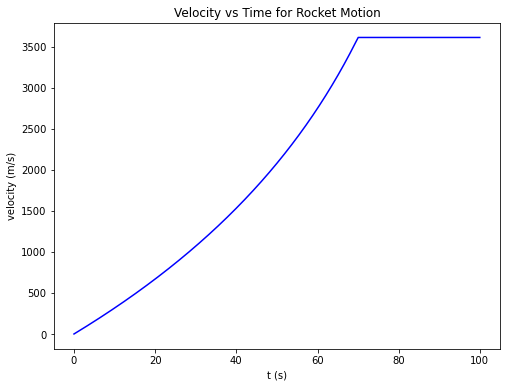

Final Velocity of the Rocket =  3612  m/s


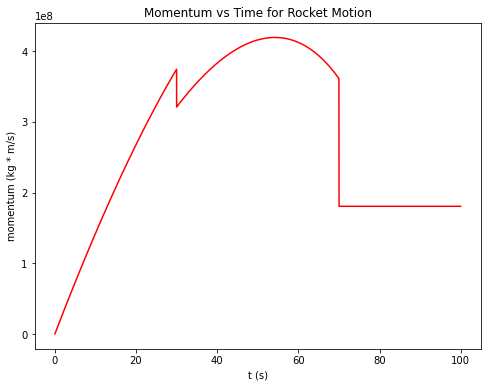

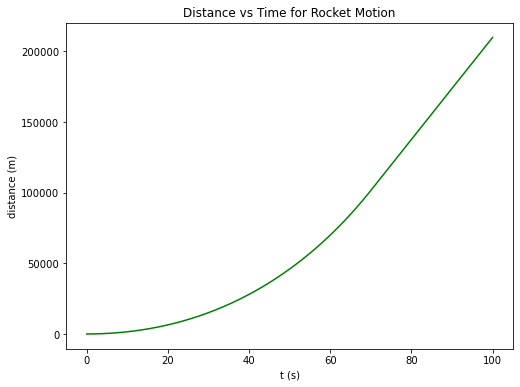

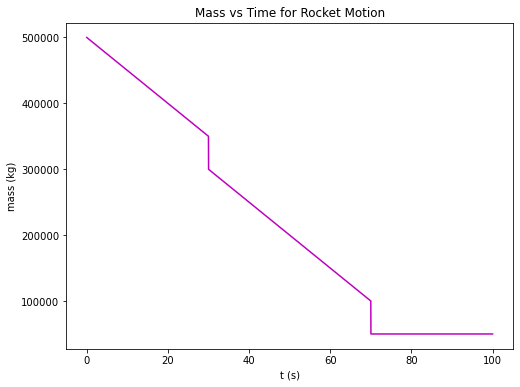

In [4]:
plt.figure(figsize=(8,6))
plt.title("Velocity vs Time for Rocket Motion")
plt.xlabel("t (s)")
plt.ylabel("velocity (m/s)")
plt.plot(tarray,varray,'b-')
plt.show()
vel = len(varray)
print("Final Velocity of the Rocket = ", round(varray[vel-1]), " m/s")

plt.figure(figsize=(8,6))
plt.title("Momentum vs Time for Rocket Motion")
plt.xlabel("t (s)")
plt.ylabel("momentum (kg * m/s)")
plt.plot(tarray,parray,'r-')
plt.show()

plt.figure(figsize=(8,6))
plt.title("Distance vs Time for Rocket Motion")
plt.xlabel("t (s)")
plt.ylabel("distance (m)")
plt.plot(tarray,darray,'g-')
plt.show()

plt.figure(figsize=(8,6))
plt.title("Mass vs Time for Rocket Motion")
plt.xlabel("t (s)")
plt.ylabel("mass (kg)")
plt.plot(tarray,marray,'m-')
plt.show()

## Interesting Note
The momentum of the rocket increases and eventually reaches a peak before it decreases once again. In the end, the momentum levels out and remains at a constant value. The first drop off is caused by the "ejection" of the first fuel pod. At the point of the second, larger drop off, the second fuel pod is "ejected" but the drop is momentum is much larger.

This is caused by the decrease in weight. At the time of the first drop off, 50,000 kg was "ejected" but the rocket still had a total weight of 300,000 kg. At the time of the final, larger drop off, 50,000 kg was "ejected" which was 1/3 of the total weight. Since the percentage of mass lost in the second drop off was larger than the the percentage of mass dropped in the first drop off, the second drop off in momentum was a larger decrease.

##  Using a Lighter Rocket

In this simulation below we are going to use a rocket with a lighter mass and less fuel to see how it will effect the velocity of the rocket.

In [5]:
mulfac = 1000 #multiply factor
m0 = 300 * mulfac #mass of rocket
mfuel0 = .6*m0
mfuelcan0 = .1*m0
rocketpos = 0
vex = 3000 #exhaust velocity - 3000 m/s
v0 = 0

t = 0
dt = .01
burnrate = -5 * mulfac
Nsteps = int(100/dt)
dist = 0

darray = np.zeros(Nsteps)
varray = np.zeros(Nsteps)
tarray = np.zeros(Nsteps)
marray = np.zeros(Nsteps)
parray = np.zeros(Nsteps)

darray[0] = dist
varray[0] = v0
tarray[0] = t
marray[0] = m0
parray[0] = m0 * v0

data = np.array([darray[0],varray[0],marray[0]])

for i in range(1,Nsteps):
    data = ode.Euler(rocket,data,t,dt)
    
    t = t + dt
    
    tarray[i] = t
    darray[i] = data[0]
    varray[i] = data[1]
    marray[i] = data[2]
    
    if marray[i] <= m0 - (mfuel0 + mfuelcan0):
        burnrate = 0
        marray[i] = marray[i] - mfuelcan0
    if marray[i] <= .7 * m0:
        marray[i] = marray[i] - mfuelcan0
        
    parray[i] = marray[i] * varray[i]
    


## Plotting the Results of Lighter Rocket

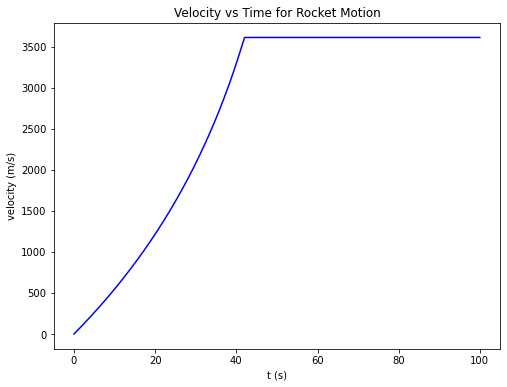

Final Velocity of the Rocket =  3611  m/s


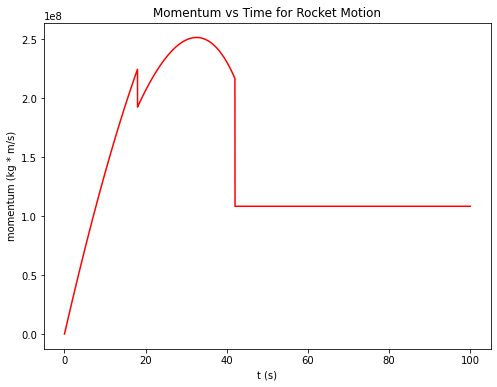

In [6]:
plt.figure(figsize=(8,6))
plt.title("Velocity vs Time for Rocket Motion")
plt.xlabel("t (s)")
plt.ylabel("velocity (m/s)")
plt.plot(tarray,varray,'b-')
plt.show()
vel = len(varray)
print("Final Velocity of the Rocket = ", round(varray[vel-1]), " m/s")

plt.figure(figsize=(8,6))
plt.title("Momentum vs Time for Rocket Motion")
plt.xlabel("t (s)")
plt.ylabel("momentum (kg * m/s)")
plt.plot(tarray,parray,'r-')
plt.show()

As we can see from the graph above, our rocket of a lower mass (300,000kg) reaches the same final speed as our original rocket. Compared to our original rocket, this rocket reaches its final speed around 30 seconds faster. We also see this reflected in the momentum of the second rocket, as it follows the same curve but in a shorter timestep. The difference with momentum is we have a smaller momentum due to the smaller mass. <br> <br> To follow up, below is a rocket with a mass of 100,000kg to see if we get the same trend. 

In [7]:
mulfac = 1000 #multiply factor
m0 = 100 * mulfac #mass of rocket
mfuel0 = .6*m0
mfuelcan0 = .1*m0
rocketpos = 0
vex = 3000 #exhaust velocity - 3000 m/s
v0 = 0

t = 0
dt = .01
burnrate = -5 * mulfac
Nsteps = int(100/dt)
dist = 0

darray = np.zeros(Nsteps)
varray = np.zeros(Nsteps)
tarray = np.zeros(Nsteps)
marray = np.zeros(Nsteps)
parray = np.zeros(Nsteps)

darray[0] = dist
varray[0] = v0
tarray[0] = t
marray[0] = m0
parray[0] = m0 * v0

data = np.array([darray[0],varray[0],marray[0]])

for i in range(1,Nsteps):
    data = ode.Euler(rocket,data,t,dt)
    
    t = t + dt
    
    tarray[i] = t
    darray[i] = data[0]
    varray[i] = data[1]
    marray[i] = data[2]
    
    if marray[i] <= m0 - (mfuel0 + mfuelcan0):
        burnrate = 0
        marray[i] = marray[i] - mfuelcan0
    if marray[i] <= .7 * m0:
        marray[i] = marray[i] - mfuelcan0
        
    parray[i] = marray[i] * varray[i]
    


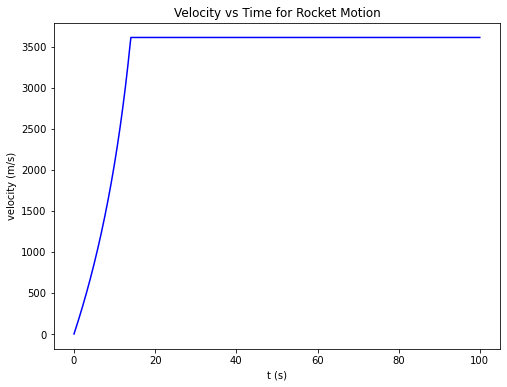

Final Velocity of the Rocket =  3610  m/s


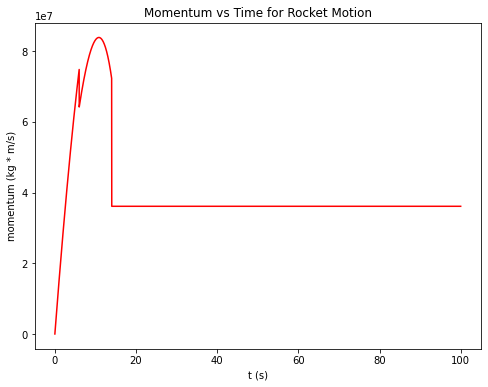

In [8]:
plt.figure(figsize=(8,6))
plt.title("Velocity vs Time for Rocket Motion")
plt.xlabel("t (s)")
plt.ylabel("velocity (m/s)")
plt.plot(tarray,varray,'b-')
plt.show()
vel = len(varray)
print("Final Velocity of the Rocket = ", round(varray[vel-1]), " m/s")

plt.figure(figsize=(8,6))
plt.title("Momentum vs Time for Rocket Motion")
plt.xlabel("t (s)")
plt.ylabel("momentum (kg * m/s)")
plt.plot(tarray,parray,'r-')
plt.show()

We see again in the diagram above it reaches almost the same speed as the other two attempts, and our momentum also still follows the same curve just with a smaller value.

# Conclusion
With the conclusion of this experiment and model of a rocket, let's take a look back at the initial research questions:

1. What effect does the mass of the fuel have on the velocity of the rocket?
 - The mass of the fuel affects the momentum, which in turn affects velocity. As mass decreases, momentum is likely to decrease if the velocity remains the same. Since momentum is used to find the change in velocity from a given time stamp to another, the mass of fuel effects velocity.

2. What effect does the mass of the fuel have on the momentum of the rocket?
 - Momentum is equal to velocity multiplied by mass. Which results in the mass of fuel having a direct and sitinct correlation to the momentum of the rocket.

3. What effect does the choice of numerical integrator have on our results? (Euler, RK2, RK4)
 - Using RK2 or RK4 over Euler will result in more precise data, other than that the premise of the model and its results do not change.